# Plot Tail

In [2]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

Create parametric equations in Cylindrical Coordinates

In [3]:
def cylToCar(r, theta, z) -> tuple[list[float]]:
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x,y,z

In [4]:
r0 = 1
r1 = .5
spirals = 6
l = 10
dl = 1/10 # Start vertical Derivative
gamma = 4 # Ratio of start and end verical derivaties 

In [5]:
s0 = 0
s1 = spirals*2*np.pi
step = 100
s = np.linspace(s0, s1, step)

Symetric Helix

In [6]:
r = r0 * np.ones(len(s))
theta = s
z = s

x, y, z = cylToCar(r, theta, z)

Generated Tail (Cubic)

In [7]:
a, b, c, ss = sp.symbols("a, b, c, s", real=True)

# Z Function (Cubic)
z = sp.Function("z", real=True)(ss)

z = (a*ss**3 + b*ss**2 + c*ss)

dz = sp.diff(z,ss)
zSol = sp.solve((z.subs({ss: s1})-l ,dz.subs({ss: 0})-dl, dz.subs({ss: s1})-gamma*dl), (a, b, c))
z = sp.lambdify(ss, z.subs({a: zSol[a], b: zSol[b], c: zSol[c]}))

# R Function (Liner)
r = sp.Function("r", real=True)(ss)

r = r0 + (r1-r0)/s1 * ss
r = sp.lambdify(ss, r)

# Parametric Functions
r = r(s)
theta = s
z = z(s)

x, y, z = cylToCar(r, theta, z)

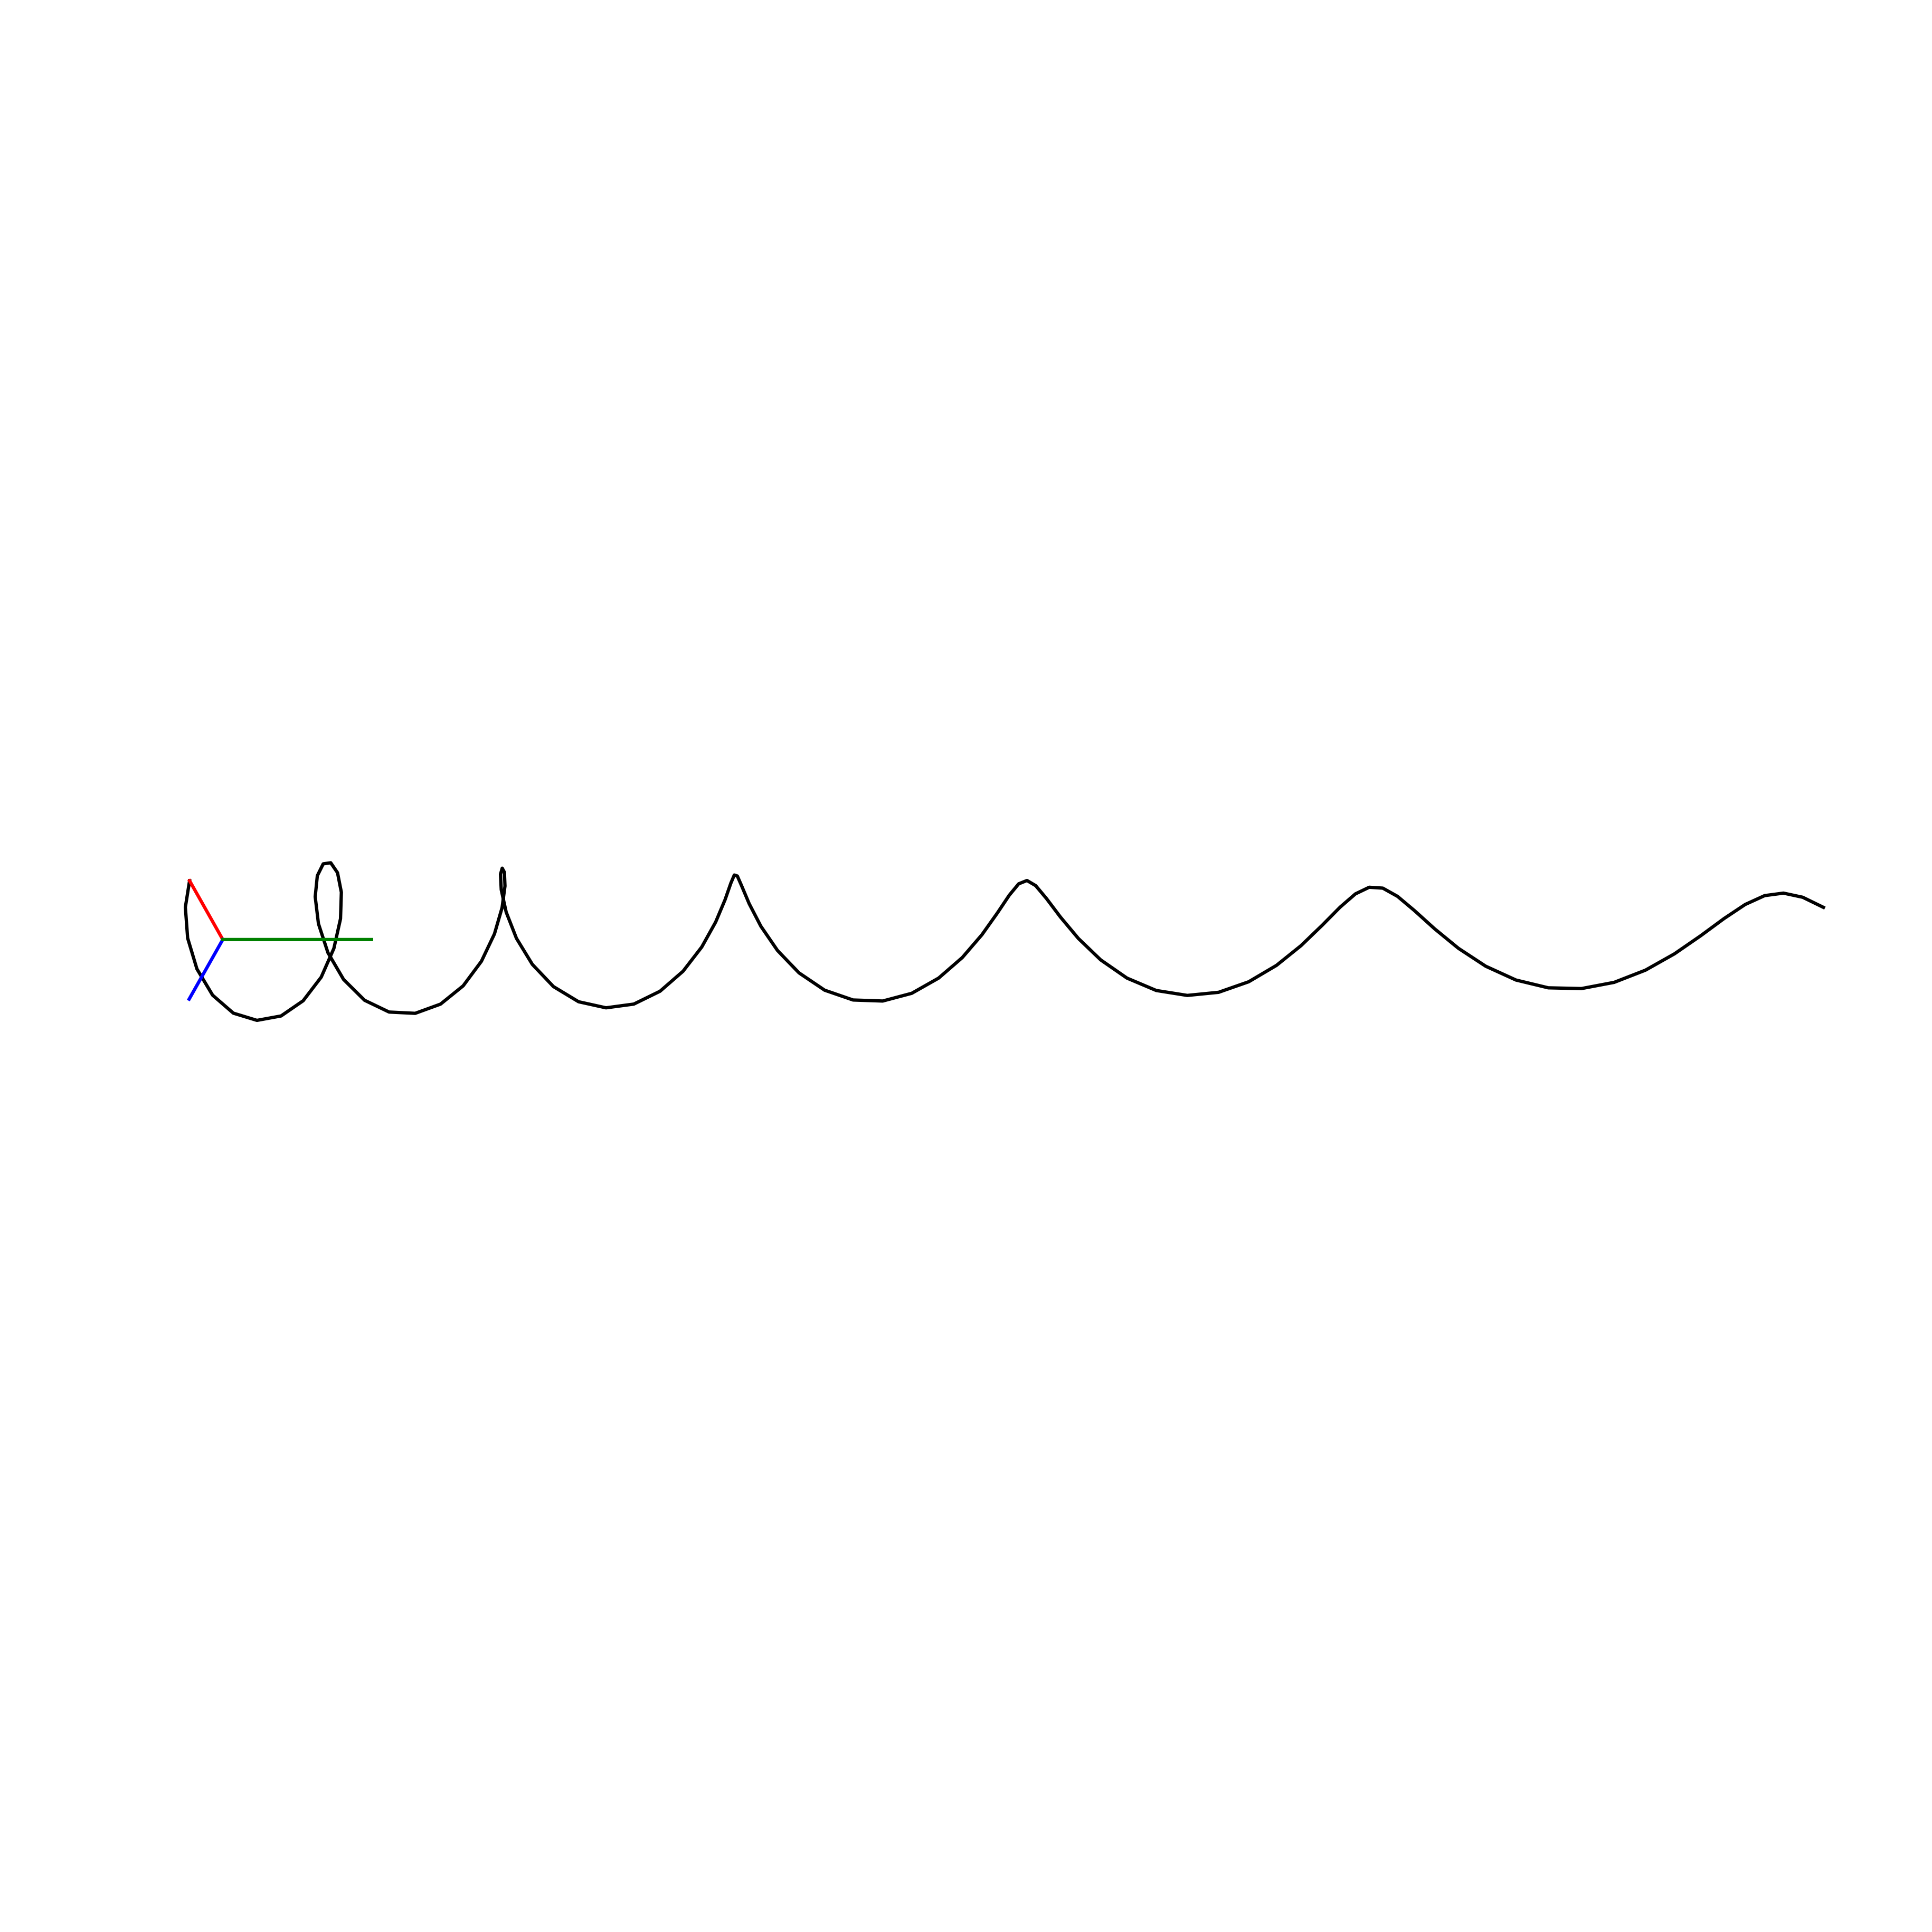

In [57]:
rect = [0, 0, 1, 1]

fig = plt.figure(figsize=(12, 12), dpi=300)
ax = fig.add_axes(rect, projection="3d")
ax.plot(x,y,z, color='k')
ax.plot([0,1], [0,0], [0,0], 'r')
ax.plot([0,0], [0,1], [0,0], 'b')
ax.plot([0,0], [0,0], [0,1], 'g')
ax.set_box_aspect([1,1,z[-1]])
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.view_init(roll=-90, azim=45)
ax.grid(False)
ax.set_axis_off()